# Assignment 4 Report

Marijan Soric and Zan Stanonik

# Task 1

## task 1a)
*Explain what the Intersection over Union is and how we can find it for two bounding
boxes. Illustrate it with a drawing.*

Intersection over Union is a measure between 0 and 1 that quantifies how well the bounding boxe predicted $\hat A$ is *similar*  to the target boxe $A$. Is a ratio of two area.

$$IoU= \frac{\lvert \hat A \cap A\rvert}{\lvert \hat A \cup A \rvert}$$

We can set a threshold $\theta = 0.5$ in order to classify if the prediction is a true positive or a false positive.

In the following drawing, we have:
- $A$ in <font color='green'>green</font> the ground truth area (the target).
- $\hat A$ in <font color='blue'>blue</font> the prediction truth area (the output).
- In <font color='cyan'>cyan</font> the intersection of the union used in the calculus of $IoU$.
![](task1a.png)

## task 1b)
*Write down the equation of precision and recall, and shortly explain what a true positive
and false positive is.*

Matrix confusion:
|       |Predicted Positive (PP)  |Predicted Negative (PN)|
|-------|-------------------------|-----------------------|
|**Positive**|True Positive (TP)  |False Negative (FN)    |
|**Negative**|False Positive (FP) |True Negative (TN)     |

Where $\hat Y$ is the prediction, and $Y$ the actual condition.

$$\mathrm{Precision} = \frac{TP}{TP+FP}= \mathbb P [Y = P \vert \hat Y = P]$$
The precision measures, when we predict a positive output $TP+FP$, how much can we trust this output (the proportion of time that's correct). 


$$\mathrm{Recall} = \frac{TP}{TP+FN}= \mathbb P [\hat Y = P \vert Y = P]$$
The recall measures, when we consider a positive condition $TP+FN$, how much the model is able to predict correctly this output (the proportion of time that's correct). 



There is an example that underlines what means each metric. Let's consider a doctor that predict $\hat Y$ if the person is pregnant ($Y=1$) or not ($Y=0$). in the case of
- A low precision is like receiving a man, and predict that the man is pregnant. When the model predict a positive example, we can't trust it.
- A low recall is like receiving a pregnant woman with large belly, and predict that the woman is not pregnant. When there is an actual positive example, the model fail to predict that it's positive.



## task 1c)
*Given the following precision and recall curve for the two classes, what is the mean average
precision?*

To compute the mean average precision (mAP) for the given precision and recall curves for two classes, we'll first compute the average precision (AP) for each class and then take the mean of the AP values.

For class 1:

|Recall1|Interpolated Precision|
|-------|----------------------|
|0.05	|1.0|
|0.1|1.0|
|0.2	|1.0|
|0.3|1.0 (interpolated)|
|0.4|	1.0 (interpolated)|
|0.5|	0.5|
|0.6|	0.5 (interpolated)|
|0.7|	0.5 (interpolated)|
|0.8|	0.5 (interpolated)|
|0.9|0.5 (interpolated)|
|1.0|0.2|
$$AP_1 = \frac{1.0 + 1.0 + 1.0 + 0.5 + 0.5 + 0.5 + 0.5 + 0.5 + 0.5 + 0.5 + 0.2}{11} = 0.61$$
| Recall2 | Interpolated Precision |
|---------|------------------------|
| 0.3     | 1.0                    |
| 0.4     | 0.8                    |
| 0.5     | 0.6                    |
| 0.6     | 0.5                    |
| 0.7     | 0.5                    |
| 0.8     | 0.5 (interpolated)    |
| 0.9     | 0.5 (interpolated)    |
| 1.0     | 0.2                    |
$$AP_1 = \frac{ 1.0 + 0.8 + 0.6 + 0.5 + 0.5 + 0.5 + 0.5 + 0.5 + 0.2}{9} = 0.56$$

$$mAP=\frac{1}{K}\sum_k AP_k \approx 0.58$$

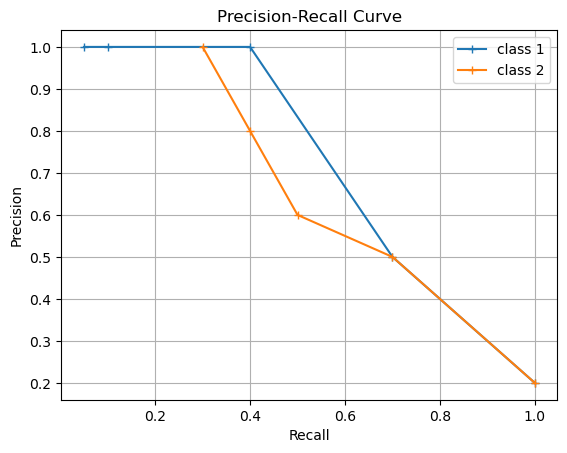

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

P = [[1.0, 1.0, 1.0, 0.5, 0.20], [1.0, 0.80, 0.60, 0.5, 0.20]]
R = [[0.05, 0.1, 0.4, 0.7, 1.0], [0.3, 0.4, 0.5, 0.7, 1.0]]

plt.plot(R[0], P[0], marker='+'),plt.plot(R[1], P[1], marker='+')
plt.xlabel('Recall'), plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(['class 1', 'class 2'])
plt.grid()
plt.show()

# Task 2

### Task 2f)


# Task 3

### Task 3a)
*The SSD architecture produces a fixed-size number of bounding boxes and a score for each
bounding box. When performing inference with SSD, we need to filter out a set of overlapping
boxes. What is this filtering operation called?*

It's called **non-maximum suppression**.

### Task 3b)
*The SSD architecture predicts bounding boxes at multiple scales to enable the network to
detect objects of different sizes.
Is the following true or false: Predictions from the deeper layers in SSD are responsible to
detect small objects.*

**False.** 
> Starting from the left (shallow layer), Conv4_3 detects objects at the smallest scale 0.2 (or 0.1 sometimes), and then increases linearly to the rightmost layer at a scale of 0.9 (deep layer). 

### Task 3c)
*SSD use k number of ”anchors” 2 with different aspect ratios at each spatial location in a
feature map to predict c class scores and 4 offsets relative to the original box shape.
Why do they use different bounding box aspect ratios at the same spatial location?*

To cover objects of different shapes and sizes. Quote:
> Combining the scale value with the target aspect ratios, we compute the width and the height of the default boxes. For layers making 6 predictions, SSD starts with 5 target aspect ratios: 1, 2, 3, 1/2, and 1/3. 

### Task 3d)
*What is the main difference between SSD and YOLOv1/v2 (The YOLO version they refer
to in the SSD paper)?*

In the YOLO architecture, there are only one scale feature map whereas in the SSD one, there are multiple scale feature maps, that allows a better detection of smaller and larger objects.
> YOLO uses k-means clustering on the training dataset to determine those default boundary boxes.
> Multi-scale feature maps for detection We add convolutional feature layers to the end of the truncated base network. These layers decrease in size progressively and allow predictions of detections at multiple scales. The convolutional model for predicting detections is different for each feature layer (cf Overfeat[4] and YOLO[5] that operate on a single scale feature map).


### Task 3e)
*Given a SSD framework, where the first scale the network predicts at is at the last feature
map with a resolution of $38\times 38$ $(H\times W)$. For each anchor location, we place 6 different anchors
with different aspect ratios. How many anchors boxes do we have in total for this feature map?*


### Task 3f)
*The network outlined in the previous subtask predicts at multiple resolutions, specifically
$38 ×38, 19 ×19, 10 ×10, 5 ×5, 3 ×3$ and $1 ×1$. It uses 6 different aspect ratios at each location in
every feature map as anchors. How many anchors boxes do we have in total for the entire network?*

# Task 4

## Task 4b)

FILL IN ANSWER. 

## Task 4c)
FILL IN ANSWER. 


## Task 4d)
FILL IN ANSWER. 


## Task 4e)
FILL IN ANSWER. 


## Task 4f)
FILL IN ANSWER. 